# Retrieve MGXS from h5 and plot values

In [60]:
import h5py
import pprint

import numpy as np
import matplotlib.pyplot as plt

In [40]:
def print_hdf5_structure(file_path):
    """
    Prints the structure of an HDF5 file, including groups, datasets, and attributes.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    """
    with h5py.File(file_path, 'r') as hdf:
        def print_structure(name, obj):
            print(name)
            if isinstance(obj, h5py.Group):
                print("  Group")
            elif isinstance(obj, h5py.Dataset):
                print("  Dataset")
                print(f"    Shape: {obj.shape}")
                print(f"    Data type: {obj.dtype}")
            elif isinstance(obj, h5py.AttributeManager):
                print("  Attributes")

        hdf.visititems(print_structure)


In [41]:
def access_hdf5_data_v0(file_path, group_name=None, dataset_name=None):
    """
    Accesses a specific group or dataset within an HDF5 file and prints its contents.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    - group_name (str, optional): The name of the group to access. If None, accesses the root group.
    - dataset_name (str, optional): The name of the dataset to access within the group. If None, accesses the group only.
    
    Returns:
    - data (numpy.ndarray): The data contained in the specified dataset, or None if only a group is accessed.
    """
    with h5py.File(file_path, 'r') as hdf:
        if group_name:
            group = hdf[group_name]
        else:
            group = hdf['/']  # Root group

        if dataset_name:
            dataset = group[dataset_name]
            data = dataset[:]
            print(f"Data from dataset '{dataset_name}':\n{data}")
            return data
        else:
            print(f"Group '{group_name}' accessed.")
            return None


In [42]:
def get_hdf5_attributes(file_path, group_name=None, dataset_name=None):
    """
    Retrieves and prints attributes of a specified dataset or group within an HDF5 file.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    - group_name (str, optional): The name of the group containing the dataset. If None, accesses the root group.
    - dataset_name (str, optional): The name of the dataset to access within the group. If None, accesses attributes of the group.
    
    Returns:
    - attributes (dict): A dictionary containing the attributes and their values.
    """
    with h5py.File(file_path, 'r') as hdf:
        if group_name:
            group = hdf[group_name]
        else:
            group = hdf['/']  # Root group

        if dataset_name:
            obj = group[dataset_name]
        else:
            obj = group

        attributes = {attr: obj.attrs[attr] for attr in obj.attrs}
        print(f"Attributes for {'dataset' if dataset_name else 'group'} '{dataset_name or group_name}':")
        for key, value in attributes.items():
            print(f"  {key}: {value}")
        return attributes


In [43]:
def retrieve_hdf5_structure(file_path):
    """
    Retrieves the structure of an HDF5 file as a nested dictionary.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    
    Returns:
    - structure_dict (dict): A nested dictionary representing the structure of the HDF5 file.
    """
    structure_dict = {}

    def add_to_dict(name, obj):
        keys = name.split('/')
        current_level = structure_dict

        for key in keys[:-1]:
            current_level = current_level.setdefault(key, {})

        if isinstance(obj, h5py.Group):
            current_level[keys[-1]] = {}
        elif isinstance(obj, h5py.Dataset):
            current_level[keys[-1]] = {
                'type': 'Dataset',
                'shape': obj.shape,
                'dtype': str(obj.dtype),
                'attributes': {attr: obj.attrs[attr] for attr in obj.attrs}
            }

    with h5py.File(file_path, 'r') as hdf:
        hdf.visititems(add_to_dict)

    return structure_dict


In [44]:
def retrieve_hdf5_structure_with_root_attributes(file_path):
    """
    Retrieves the structure of an HDF5 file, including root attributes, as a nested dictionary.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    
    Returns:
    - structure_dict (dict): A nested dictionary representing the structure of the HDF5 file, including root attributes.
    """
    structure_dict = {}

    with h5py.File(file_path, 'r') as hdf:
        # Capture root-level attributes
        structure_dict['root_attributes'] = {attr: hdf.attrs[attr] for attr in hdf.attrs}
        
        def add_to_dict(name, obj):
            keys = name.split('/')
            current_level = structure_dict

            for key in keys[:-1]:
                current_level = current_level.setdefault(key, {})

            if isinstance(obj, h5py.Group):
                current_level[keys[-1]] = {}
                # Capture attributes of the group
                current_level[keys[-1]]['attributes'] = {attr: obj.attrs[attr] for attr in obj.attrs}
            elif isinstance(obj, h5py.Dataset):
                current_level[keys[-1]] = {
                    'type': 'Dataset',
                    'shape': obj.shape,
                    'dtype': str(obj.dtype),
                    'attributes': {attr: obj.attrs[attr] for attr in obj.attrs}
                }

        hdf.visititems(add_to_dict)

    return structure_dict

# Read h5 file

In [192]:
file_path = 'mgxs_order7_SHEM-361.h5'

# Print the entire structure of the HDF5 file
print_hdf5_structure(file_path)

clad
  Group
clad/565K
  Group
clad/565K/absorption
  Dataset
    Shape: (361,)
    Data type: float64
clad/565K/scatter_data
  Group
clad/565K/scatter_data/g_max
  Dataset
    Shape: (361,)
    Data type: int64
clad/565K/scatter_data/g_min
  Dataset
    Shape: (361,)
    Data type: int64
clad/565K/scatter_data/multiplicity_matrix
  Dataset
    Shape: (4048,)
    Data type: float64
clad/565K/scatter_data/scatter_matrix
  Dataset
    Shape: (32384,)
    Data type: float64
clad/565K/total
  Dataset
    Shape: (361,)
    Data type: float64
clad/kTs
  Group
clad/kTs/565K
  Dataset
    Shape: ()
    Data type: float64
fuel
  Group
fuel/565K
  Group
fuel/565K/absorption
  Dataset
    Shape: (361,)
    Data type: float64
fuel/565K/chi
  Dataset
    Shape: (361,)
    Data type: float64
fuel/565K/fission
  Dataset
    Shape: (361,)
    Data type: float64
fuel/565K/nu-fission
  Dataset
    Shape: (361,)
    Data type: float64
fuel/565K/scatter_data
  Group
fuel/565K/scatter_data/g_max
  Dataset


In [193]:
# # Retrieve the structure of the HDF5 file as a dictionary
# hdf5_structure = retrieve_hdf5_structure(file_path)

# # Print the structure dictionary (optional)
# import pprint
# pprint.pprint(hdf5_structure)


# Retrieve the structure of the HDF5 file as a dictionary
hdf5_structure = retrieve_hdf5_structure_with_root_attributes(file_path)

# Display the structure dictionary
pprint.pprint(hdf5_structure)

{'clad': {'565K': {'absorption': {'attributes': {},
                                  'dtype': 'float64',
                                  'shape': (361,),
                                  'type': 'Dataset'},
                   'attributes': {},
                   'scatter_data': {'attributes': {},
                                    'g_max': {'attributes': {},
                                              'dtype': 'int64',
                                              'shape': (361,),
                                              'type': 'Dataset'},
                                    'g_min': {'attributes': {},
                                              'dtype': 'int64',
                                              'shape': (361,),
                                              'type': 'Dataset'},
                                    'multiplicity_matrix': {'attributes': {},
                                                            'dtype': 'float64',
                          

In [194]:
# # Get and print attributes of a specific dataset or group
attributes = get_hdf5_attributes(file_path, group_name='clad/565K', dataset_name='absorption')

Attributes for dataset 'absorption':


In [195]:
# # Access and print data from a specific dataset
# data = access_hdf5_data_v0(file_path, group_name='clad/565K', dataset_name='absorption')

In [196]:
def access_hdf5_data(file_path, group_name=None, dataset_name=None, verbose=False):
    """
    Accesses a specific group, dataset, or root attributes within an HDF5 file and returns its contents.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    - group_name (str, optional): The name of the group to access. If None, accesses the root group.
    - dataset_name (str, optional): The name of the dataset to access within the group. If None, accesses the group or root attributes.
    - verbose (bool, optional): Whether to print the retrieved data or attributes. Default is True.
    
    Returns:
    - data (numpy.ndarray or dict): The data contained in the specified dataset, or attributes if accessing a group/root.
    """
    with h5py.File(file_path, 'r') as hdf:
        # If no group is specified, access the root level
        if group_name is None:
            obj = hdf
        else:
            obj = hdf[group_name]
        
        # If no dataset is specified, return attributes of the group or root
        if dataset_name is None:
            attributes = {attr: obj.attrs[attr] for attr in obj.attrs}
            if verbose:
                print(f"Attributes for {'root' if group_name is None else group_name}:")
                for key, value in attributes.items():
                    print(f"  {key}: {value}")
            return attributes
        else:
            dataset = obj[dataset_name]
            data = dataset[:]
            if verbose:
                print(f"Data from dataset '{dataset_name}':\n{data}")
            return data


In [197]:
# Access root attributes
root_attributes = access_hdf5_data(file_path)

# Access data from a specific dataset under a group
clad_absorption_data = access_hdf5_data(file_path, group_name='clad/565K', dataset_name='absorption', \
                                        verbose=True)

# Access attributes of a specific group
clad_attributes = access_hdf5_data(file_path, group_name='clad',verbose=True)

Data from dataset 'absorption':
[1.89538417e-03 1.59085432e-03 1.11652305e-03 7.16384113e-04
 5.43003306e-04 4.42294166e-04 3.46289906e-04 2.90945789e-04
 2.45212798e-04 1.81168821e-04 1.78672001e-04 2.04753469e-04
 2.47051247e-04 3.63426387e-04 5.41970696e-04 5.09846849e-04
 4.77775946e-04 4.59504541e-04 4.48847243e-04 4.35206694e-04
 4.30177766e-04 4.63676525e-04 5.81763952e-04 5.71128883e-04
 5.47566902e-04 5.31889135e-04 5.26545316e-04 5.24910577e-04
 5.25177304e-04 5.33209934e-04 5.38418917e-04 5.40270340e-04
 5.38503800e-04 5.92567727e-04 5.01387574e-04 6.53612027e-04
 5.94588210e-04 6.44200351e-04 5.43829440e-04 6.55296319e-04
 8.84000392e-04 5.24547626e-04 1.39806578e-03 9.89400421e-04
 1.15082620e-03 7.98161104e-04 1.15144249e-03 2.35263434e-03
 7.35846723e-04 8.20984229e-04 1.47085867e-03 1.74166674e-03
 8.52621080e-04 1.32536784e-03 2.16398995e-03 1.68507757e-03
 2.42421904e-03 4.31292587e-03 3.03841378e-03 6.18531147e-03
 7.85058052e-03 1.48772427e-03 4.31845678e-03 3.34055

In [198]:
root_attributes.keys()

dict_keys(['delayed_groups', 'energy_groups', 'filetype', 'group structure', 'version'])

In [199]:
hdf5_structure.keys()

dict_keys(['root_attributes', 'clad', 'fuel', 'moderator'])

In [200]:
hdf5_structure['clad'].keys()

dict_keys(['attributes', '565K', 'kTs'])

In [201]:
clad_attributes['order']

7

# put this to use to plot some data

In [202]:
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import LogLocator

In [203]:
# Access root attributes
root_attributes = access_hdf5_data(file_path)
group_edges = root_attributes['group structure']
# flip group edges to have highest energies first, since fastest groups have the lowest index
group_edges = np.flip(group_edges)

# Access total xs
xs_tot = {}
for key in hdf5_structure.keys():
    if key != 'root_attributes':
        xs_tot[key] = access_hdf5_data(file_path, group_name=f'{key}/565K', dataset_name='total')

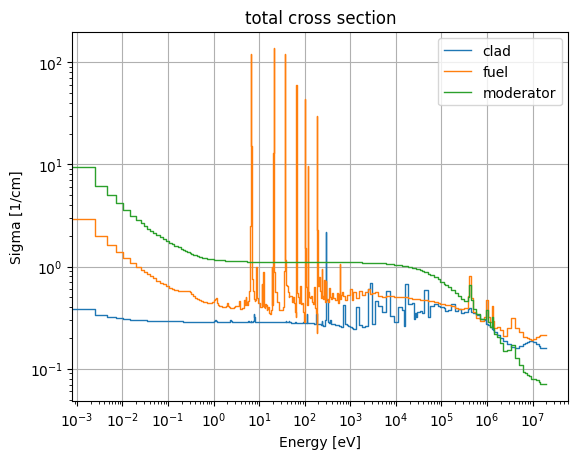

In [204]:
fig = plt.figure()

leg =[]
for key in xs_tot:
    y = xs_tot[key]
    if y.ndim == 1:
        # Extend the mgxs values array for matplotlib's step plot
        y = np.insert(y, 0, y[0])

        # Create a step plot for the MGXS
        plt.loglog(group_edges, y, drawstyle='steps', linewidth=1)
        leg.append( key)

axs = fig.axes
ax = axs[0]
ax.xaxis.set_major_locator(FixedLocator(locs=np.logspace(-5, 7, 13)))
locmin = LogLocator(base=10,subs=np.linspace(0,1.0,11)[1:-1],numticks=1000)
ax.xaxis.set_minor_locator(locmin)
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Sigma [1/cm]')

plt.title('total cross section')
plt.legend(leg)
# ax.set_xlim((group_edges.min(), group_edges.max()))
plt.grid(True)
plt.show()

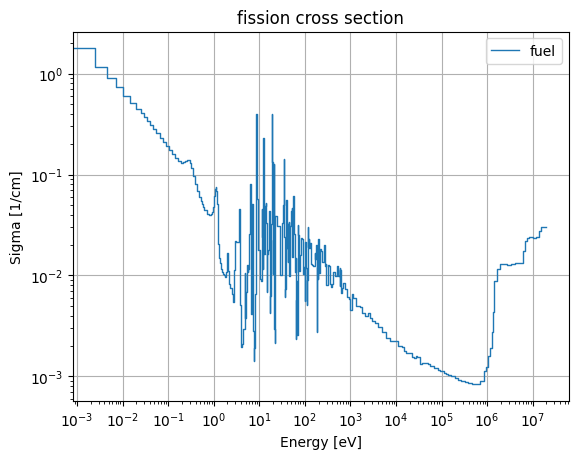

In [205]:
# Access fission xs
y = access_hdf5_data(file_path, group_name='fuel/565K', dataset_name='fission')

fig = plt.figure()

# Extend the mgxs values array for matplotlib's step plot
y = np.insert(y, 0, y[0])

# Create a step plot for the MGXS
plt.loglog(group_edges, y, drawstyle='steps', linewidth=1, label='fuel')

axs = fig.axes
ax = axs[0]
ax.xaxis.set_major_locator(FixedLocator(locs=np.logspace(-5, 7, 13)))
locmin = LogLocator(base=10,subs=np.linspace(0,1.0,11)[1:-1],numticks=1000)
ax.xaxis.set_minor_locator(locmin)
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Sigma [1/cm]')

plt.title('fission cross section')
plt.legend()
# ax.set_xlim((group_edges.min(), group_edges.max()))
plt.grid(True)
plt.show()

In [206]:
attributes = access_hdf5_data(file_path, group_name='clad',verbose=True)
order = attributes['order']


for key in hdf5_structure.keys():
    if key != 'root_attributes':
        y = access_hdf5_data(file_path, group_name=f'{key}/565K/scatter_data', dataset_name='scatter_matrix')
        gmin = access_hdf5_data(file_path, group_name=f'{key}/565K/scatter_data', dataset_name='g_min')
        gmax = access_hdf5_data(file_path, group_name=f'{key}/565K/scatter_data', dataset_name='g_max')
        print(key,y.shape,gmin.shape)
print((np.sum(gmax-gmin)+361)*(order+1))

Attributes for clad:
  fissionable: False
  order: 7
  representation: b'isotropic'
  scatter_format: b'legendre'
  scatter_shape: b"[G][G'][Order]"
clad (32384,) (361,)
fuel (65680,) (361,)
moderator (497384,) (361,)
497384


In [212]:
def generate_2d_scatter_matrix_v0(file_path, group_name):
    """
    Generates a 2D scatter matrix from the 1D scatter_matrix data using g_min and g_max.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    - group_name (str): The name of the group containing the g_min, g_max, and scatter_matrix datasets.
    
    Returns:
    - scatter_matrix_2d (numpy.ndarray): The reconstructed 2D scatter matrix.
    """
    with h5py.File(file_path, 'r') as hdf:
        # Access the datasets
        g_min = hdf[f'{group_name}/g_min'][:] - 1
        g_max = hdf[f'{group_name}/g_max'][:] - 1
        scatter_matrix_1d = hdf[f'{group_name}/scatter_matrix'][:]
        
        G = len(g_min)  # Size of the square matrix
        scatter_matrix_2d = np.zeros((G, G))
        
        # Fill the 2D matrix using g_min, g_max, and scatter_matrix_1d
        index = 0
        for i in range(G):
            for j in range(g_min[i], g_max[i] + 1):
                scatter_matrix_2d[j, i] = scatter_matrix_1d[index]
                index += 1
                
    return scatter_matrix_2d

In [226]:
import h5py
import numpy as np

def generate_2d_scatter_matrix(file_path, group_name, verbose=False):
    """
    Generates a 2D scatter matrix from the 1D scatter_matrix data using g_min and g_max.
    
    Parameters:
    - file_path (str): The path to the HDF5 file.
    - group_name (str): The name of the group containing the g_min, g_max, and scatter_matrix datasets.
    
    Returns:
    - scatter_matrix_2d (numpy.ndarray): The reconstructed 2D scatter matrix.
    """
    # Extract the top-level group name (the part before the first '/')
    top_level_group = group_name.split('/')[0]

    # Retrieve the order attribute from the top-level group
    attributes = access_hdf5_data(file_path, group_name=top_level_group, verbose=verbose)
    order = attributes['order']

    with h5py.File(file_path, 'r') as hdf:
        # Access the datasets
        g_min = hdf[f'{group_name}/g_min'][:] - 1  # Adjust for zero-based indexing in Python
        g_max = hdf[f'{group_name}/g_max'][:] - 1  # Adjust for zero-based indexing in Python
        scatter_matrix_1d = hdf[f'{group_name}/scatter_matrix'][:]
        
        G = len(g_min)  # Size of the square matrix
        scatter_matrix_2d = np.zeros((G, G, order+1))
        
        # Fill the 2D matrix using g_min, g_max, and scatter_matrix_1d
        index = 0
        for i in range(G):
            for j in range(g_min[i], g_max[i] + 1):
                for m in range(order+1):
                    scatter_matrix_2d[j, i, m] = scatter_matrix_1d[index]
                    index += 1
                
    return scatter_matrix_2d

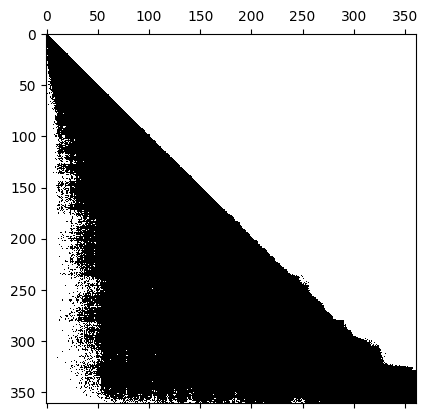

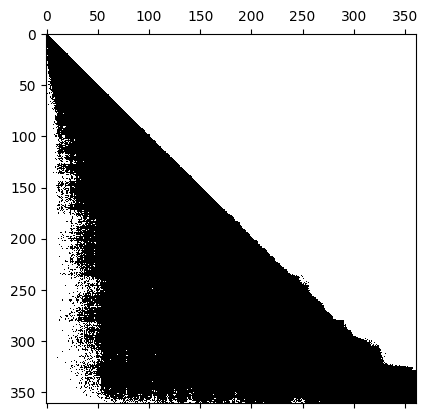

0.0


In [233]:
# Usage example
group_name = 'moderator/565K/scatter_data'

file_path0 = 'mgxs_order0_SHEM-361.h5'

scatter_matrix_2d_old = generate_2d_scatter_matrix_v0(file_path0, group_name)
scatter_matrix_2d_new = generate_2d_scatter_matrix(file_path, group_name)

# Optionally, print the resulting 2D scatter matrix
plt.figure()
plt.spy(scatter_matrix_2d_old[:,:])
plt.show()

plt.figure()
plt.spy(scatter_matrix_2d_new[:,:,0])
plt.show()

# plt.figure()
# plt.contourf(scatter_matrix_2d_old/scatter_matrix_2d_new[:,:,0])
# plt.colorbar()
# plt.show()
print(np.max(np.abs(scatter_matrix_2d_new[:,:,0]-scatter_matrix_2d_old)))

In [231]:
xs_scatt = {}
for key in hdf5_structure.keys():
    if key != 'root_attributes':
        xs_scatt[key] = generate_2d_scatter_matrix(file_path, group_name=f'{key}/565K/scatter_data')

clad


/var/folders/dy/lrw2_gjd4s37q1w7dz8kh1jm0000gr/T/ipykernel_27267/970981398.py:9: RuntimeWarning: divide by zero encountered in log
  cax1 = ax1.contourf(np.flip(np.log(xs_scatt[key][:,:,0] + 0*np.finfo(float).eps), axis=0), 100, cmap='viridis')


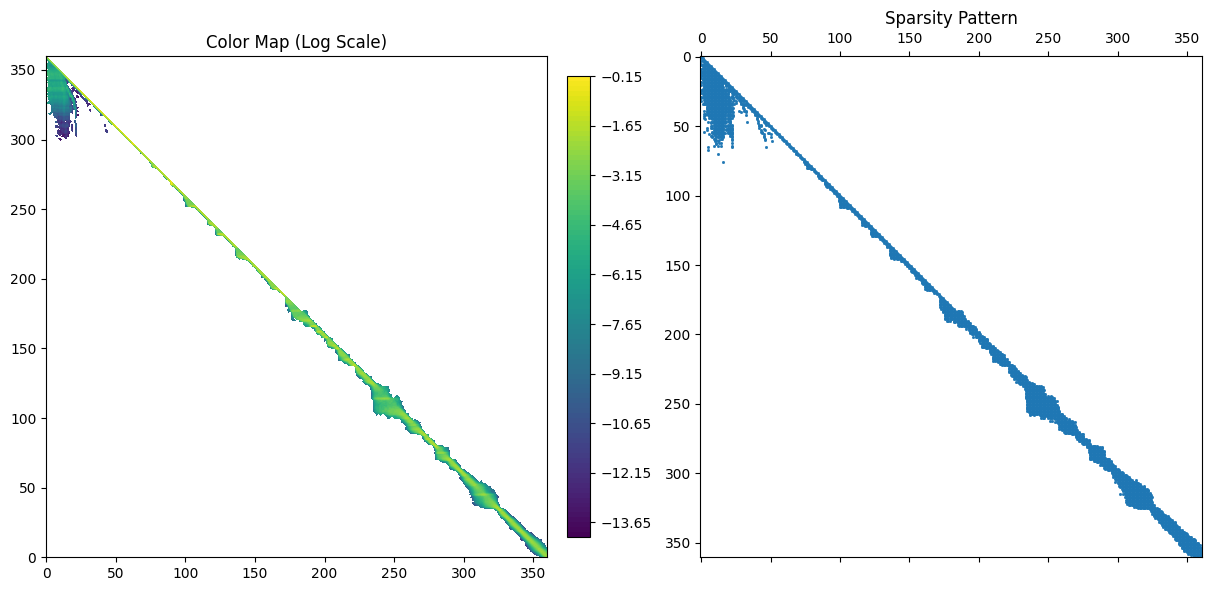

fuel


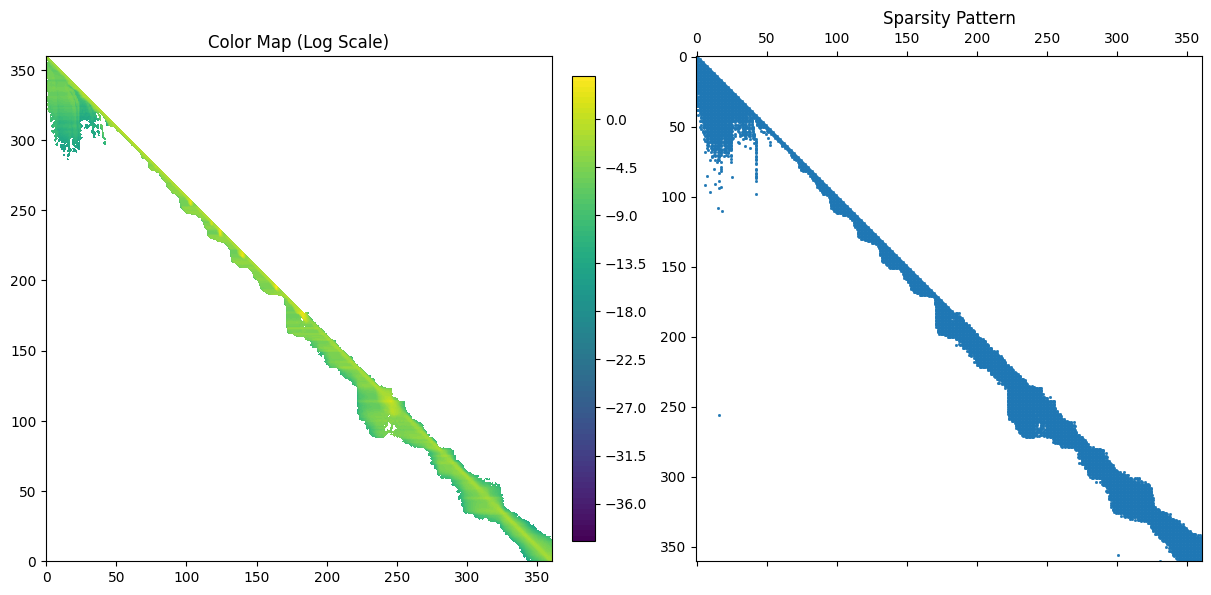

moderator


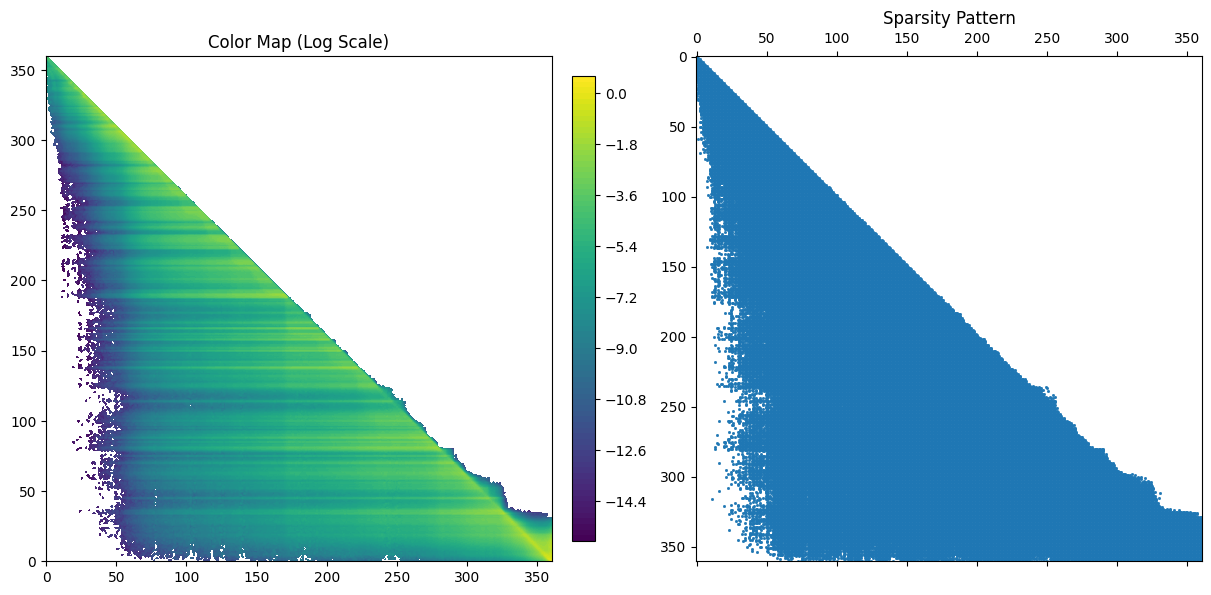

In [232]:
def plot_scatter_matrix_side_by_side(xs_scatt):
    for key in xs_scatt:
        print(key)
        
        # Create a figure with constrained layout to keep aspect ratios
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
        
        # Plot the color map (log scale to remove 0 values)
        cax1 = ax1.contourf(np.flip(np.log(xs_scatt[key][:,:,0] + 0*np.finfo(float).eps), axis=0), 100, \
                            cmap='viridis')
        
        # Ensure ax1 remains square
        ax1.set_aspect('equal', 'box')
        
        # Add colorbar with adjusted position
        cbar = fig.colorbar(cax1, ax=ax1, fraction=0.046, pad=0.04)
        ax1.set_title('Color Map (Log Scale)')
        
        # Plot the sparsity pattern
        ax2.spy(xs_scatt[key][:,:,0], markersize=1)
        ax2.set_aspect('equal', 'box')
        ax2.set_title('Sparsity Pattern')
        
        plt.show()

plot_scatter_matrix_side_by_side(xs_scatt)


In [67]:
group_edges

array([1.96403e+07, 1.49182e+07, 1.38403e+07, 1.16183e+07, 9.99999e+06,
       9.04836e+06, 8.18730e+06, 7.40817e+06, 6.70319e+06, 6.06530e+06,
       4.96585e+06, 4.06569e+06, 3.32871e+06, 2.72531e+06, 2.23130e+06,
       1.90139e+06, 1.63654e+06, 1.40577e+06, 1.33694e+06, 1.28696e+06,
       1.16205e+06, 1.05115e+06, 9.51119e+05, 8.60006e+05, 7.06511e+05,
       5.78443e+05, 4.94002e+05, 4.56021e+05, 4.12501e+05, 3.83884e+05,
       3.20646e+05, 2.67826e+05, 2.30014e+05, 1.95008e+05, 1.64999e+05,
       1.40000e+05, 1.22773e+05, 1.15624e+05, 9.46645e+04, 8.22974e+04,
       6.73794e+04, 5.51656e+04, 4.99159e+04, 4.08677e+04, 3.69786e+04,
       3.34596e+04, 2.92810e+04, 2.73944e+04, 2.61001e+04, 2.49991e+04,
       2.26994e+04, 1.85847e+04, 1.62005e+04, 1.48997e+04, 1.36037e+04,
       1.11377e+04, 9.11881e+03, 7.46585e+03, 6.11252e+03, 5.00451e+03,
       4.09735e+03, 3.48107e+03, 2.99618e+03, 2.70024e+03, 2.39729e+03,
       2.08410e+03, 1.81183e+03, 1.58620e+03, 1.34358e+03, 1.134